In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

csv_colon_train_path = "../data/MedFMC_train/colon/colon_train.csv"
df = pd.read_csv(csv_colon_train_path)

In [47]:
# Add column for patient ID, by extracting the last 4 digits before the file extension
df.insert(2,  "patient_id", df['img_id'].apply(lambda x: x[:-9]))

In [48]:
grouped = df.groupby('patient_id')['tumor'].nunique()

# Filter out patients that have both tumor values (0 and 1)
patients_with_both = grouped[grouped > 1].index.tolist()

print(patients_with_both)

[]


In [49]:
# Analyze CSV
columns = df.columns.tolist()
print(f"Columns: {len(columns)} ({columns})")
print(f"Rows: {len(df)}")

unique_slide_ids = df["slide_id"].unique()
print(f"Unique slide IDs: {len(unique_slide_ids)}")

unique_img_ids = df["img_id"].unique()
print(f"Unique image IDs: {len(unique_img_ids)}")

unique_patient_ids = df["patient_id"].unique()
print(f"Unique patient IDs: {len(unique_patient_ids)}")

Columns: 4 (['slide_id', 'img_id', 'patient_id', 'tumor'])
Rows: 5654
Unique slide IDs: 388
Unique image IDs: 5654
Unique patient IDs: 387


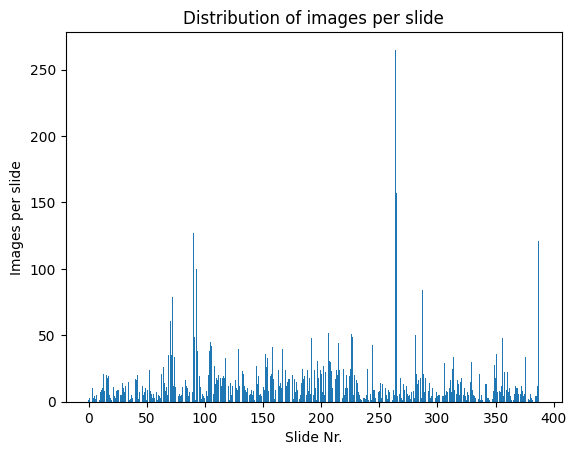

Images per slide ranging from 1 to 265 with a median of 9


In [50]:
# Analyze number of images per slide
image_counts = np.array(df.groupby('slide_id')['img_id'].count().tolist())

fix, ax = plt.subplots()
ax.set_xlabel("Slide Nr.")
ax.set_ylabel("Images per slide")
ax.set_title("Distribution of images per slide")
plt.bar(range(len(image_counts)), image_counts)
plt.show()

print(f"Images per slide ranging from {np.min(image_counts)} to {np.max(image_counts)} with a median of {int(np.median(image_counts))}")

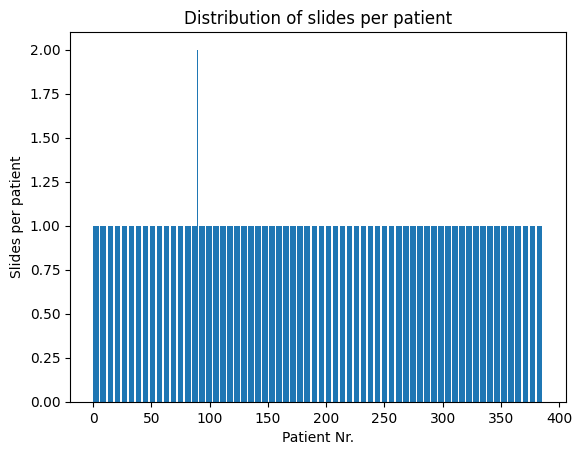

Slides per patient ranging from 1 to 2 with a median of 1


In [51]:
# Analyze number of slides per patient, ASSUMING "p0022" stands for patient 0022
slide_counts = np.array(df.groupby('patient_id')['slide_id'].nunique().tolist())

fix, ax = plt.subplots()
ax.set_xlabel("Patient Nr.")
ax.set_ylabel("Slides per patient")
ax.set_title("Distribution of slides per patient")
plt.bar(range(len(slide_counts)), slide_counts)
plt.show()

print(f"Slides per patient ranging from {np.min(slide_counts)} to {np.max(slide_counts)} with a median of {int(np.median(slide_counts))}")

In [52]:
# Check if certain slide IDs are associated with multiple patient IDs
unique_patients_per_slide = df.groupby('slide_id')['patient_id'].nunique()
shared_slide_ids = unique_patients_per_slide[unique_patients_per_slide > 1]
print(shared_slide_ids)

Series([], Name: patient_id, dtype: int64)
